In [308]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *
color = sns.color_palette()
%matplotlib inline

### Import and explore train_2016 data

In [309]:
# Import training set
train = pd.read_csv('train_2016.csv.zip')
train.shape # 90,275 rows and 3 columns

(90275, 3)

In [429]:
train.head()

,parcelid,logerror,transactiondate,year,month
0,11016594,0.0276,2016-01-01,2016,1
1,14366692,-0.1684,2016-01-01,2016,1
2,12098116,-0.0040,2016-01-01,2016,1
3,12643413,0.0218,2016-01-02,2016,1
4,14432541,-0.0050,2016-01-02,2016,1


In [425]:
train.dtypes

parcelid                    int64
logerror                  float64
transactiondate    datetime64[ns]
year                        int64
month                       int64
dtype: object

In [311]:
train.describe()

,parcelid,logerror
count,9.027500e+04,90275.000000
mean,1.298466e+07,0.011457
std,2.504510e+06,0.161079
min,1.071174e+07,-4.605000
25%,1.155950e+07,-0.025300
50%,1.254734e+07,0.006000
75%,1.422755e+07,0.039200
max,1.629608e+08,4.737000


In [312]:
train.transactiondate.describe()

count          90275
unique           352
top       2016-07-29
freq             910
Name: transactiondate, dtype: object

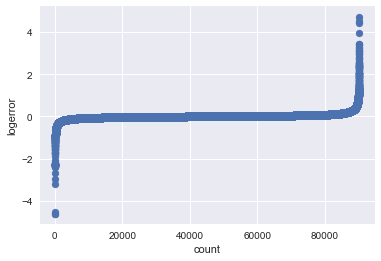

In [313]:
# Explore training set
plt.scatter(range(len(train.index)), np.sort(train.logerror.values))
plt.xlabel('count')
plt.ylabel('logerror')
plt.show()

In [314]:
ulimit = np.percentile(train.logerror, 99)
llimit = np.percentile(train.logerror, 1)
train['logerror'].loc[train['logerror']>ulimit] = ulimit
train['logerror'].loc[train['logerror']<llimit] = llimit

C:\Users\conee\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


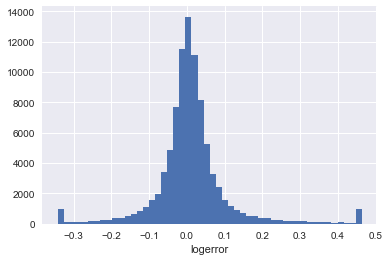

In [315]:
plt.hist(train.logerror, bins=50)
plt.xlabel('logerror')
plt.show()

In [426]:
ulimit

0.4638819999999963

In [427]:
llimit

-0.34250000000000003

In [317]:
train.transactiondate = pd.to_datetime(train.transactiondate)
train['year'] = train.transactiondate.dt.year
train['month'] = train.transactiondate.dt.month
train.head()

,parcelid,logerror,transactiondate,year,month
0,11016594,0.0276,2016-01-01,2016,1
1,14366692,-0.1684,2016-01-01,2016,1
2,12098116,-0.0040,2016-01-01,2016,1
3,12643413,0.0218,2016-01-02,2016,1
4,14432541,-0.0050,2016-01-02,2016,1


In [318]:
train.dtypes

parcelid                    int64
logerror                  float64
transactiondate    datetime64[ns]
year                        int64
month                       int64
dtype: object

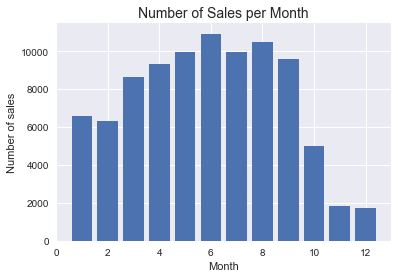

In [430]:
tpm = train.month.value_counts()
plt.bar(tpm.index, tpm.values) # Disregarding months 10-12 because of incomplete data
plt.xlabel('Month')
plt.ylabel('Number of sales')
plt.title('Number of Sales per Month',size = 14)
plt.show()

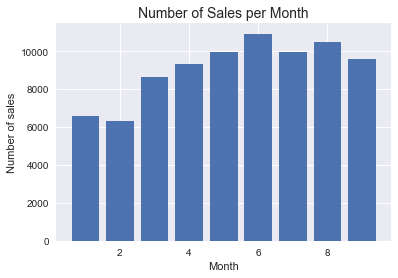

In [319]:
plt.bar(tpm.index[0:9], tpm.values[0:9]) # Disregarding months 10-12 because of incomplete data
plt.xlabel('Month')
plt.ylabel('Number of sales')
plt.title('Number of Sales per Month',size = 14)
plt.show()

In [320]:
# Find out the counts for the number of times a property was sold
train.parcelid.value_counts().reset_index().parcelid.value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

### Import and explore properties_2016 data

In [321]:
# Import 2016 properties as props
props = pd.read_csv("properties_2016.csv.zip", low_memory=False)
props.shape # nets 2,985,217 rows and 58 columns

(2985217, 58)

In [322]:
props.head(3).transpose()

,0,1,2
parcelid,10754147,10759547,10843547
airconditioningtypeid,NaN,NaN,NaN
architecturalstyletypeid,NaN,NaN,NaN
basementsqft,NaN,NaN,NaN
bathroomcnt,0,0,0
bedroomcnt,0,0,0
buildingclasstypeid,NaN,NaN,NaN
buildingqualitytypeid,NaN,NaN,NaN
calculatedbathnbr,NaN,NaN,NaN
decktypeid,NaN,NaN,NaN


In [323]:
props.rename(columns={'airconditioningtypeid': 'aircon', 'architecturalstyletypeid': 'arch_style', 
                       'basementsqft': 'area_bsmt', 'bathroomcnt': 'num_bath', 'bedroomcnt': 'num_bed', 
                       'buildingclasstypeid': 'type_framing', 'buildingqualitytypeid': 'condition', 
                       'calculatedbathnbr': 'num_bath_calc', 'decktypeid': 'type_deck', 'finishedfloor1squarefeet': 'area_first', 
                       'calculatedfinishedsquarefeet': 'area_living_calc', 'finishedsquarefeet12': 'area_finished', 
                       'finishedsquarefeet13': 'area_perimeter', 'finishedsquarefeet15': 'area_total', 
                       'finishedsquarefeet50': 'area_finished_first', 'finishedsquarefeet6': 'area_living_base', 
                       'fips': 'fips', 'fireplacecnt': 'num_fireplaces', 'fullbathcnt': 'num_bath_full', 
                       'garagecarcnt': 'num_garages', 'garagetotalsqft': 'area_garages', 'hashottuborspa': 'hashottuborspa', 
                       'heatingorsystemtypeid': 'heating', 'latitude': 'latitude', 'longitude': 'longitude', 
                       'lotsizesquarefeet': 'area_lot', 'poolcnt': 'num_pools', 'poolsizesum': 'area_pools', 
                       'pooltypeid10': 'pooltypeid10', 'pooltypeid2': 'pooltypeid2', 'pooltypeid7': 'pooltypeid7', 
                       'propertycountylandusecode': 'zoning_county', 'propertylandusetypeid': 'zoning', 
                       'propertyzoningdesc': 'zoning_property', 'rawcensustractandblock': 'rawcensustractandblock', 
                       'regionidcity': 'city', 'regionidcounty': 'county', 'regionidneighborhood': 'neighborhood', 
                       'regionidzip': 'zip', 'roomcnt': 'num_rooms', 'storytypeid': 'type_stories', 
                       'threequarterbathnbr': 'num_bath_3qtr', 'typeconstructiontypeid': 'material', 'unitcnt': 'num_units', 
                       'yardbuildingsqft17': 'area_patio', 'yardbuildingsqft26': 'area_storage', 'yearbuilt': 'build_year', 
                       'numberofstories': 'num_stories', 'fireplaceflag': 'fireplaceflag', 
                       'structuretaxvaluedollarcnt': 'tax_assessed_structure', 'taxvaluedollarcnt': 'tax_assessed_parcel', 
                       'assessmentyear': 'assessmentyear', 'landtaxvaluedollarcnt': 'tax_assessed_land', 
                       'taxamount': 'tax_total', 'taxdelinquencyflag': 'taxdelinquencyflag', 
                       'taxdelinquencyyear': 'taxdelinquencyyear', 
                       'censustractandblock': 'censustractandblock'}, inplace=True)
props.head()

,parcelid,aircon,arch_style,area_bsmt,num_bath,num_bed,type_framing,condition,num_bath_calc,type_deck,...,num_stories,fireplaceflag,tax_assessed_structure,tax_assessed_parcel,assessmentyear,tax_assessed_land,tax_total,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [324]:
pd.set_option('precision', 6)
props.describe()

,parcelid,aircon,arch_style,area_bsmt,num_bath,num_bed,type_framing,condition,num_bath_calc,type_deck,...,area_storage,build_year,num_stories,tax_assessed_structure,tax_assessed_parcel,assessmentyear,tax_assessed_land,tax_total,taxdelinquencyyear,censustractandblock
count,2.985217e+06,811519.000000,6061.000000,1628.000000,2.973755e+06,2.973767e+06,12629.000000,1.938488e+06,2.856305e+06,17096.0,...,2647.000000,2.925289e+06,682069.000000,2.930235e+06,2.942667e+06,2.973778e+06,2.917484e+06,2.953967e+06,56464.000000,2.910091e+06
mean,1.332586e+07,1.931166,7.202607,646.883292,2.209143e+00,3.088949e+00,3.725948,5.784787e+00,2.299263e+00,66.0,...,278.296562,1.964262e+03,1.401464,1.708836e+05,4.204790e+05,2.014999e+03,2.524780e+05,5.377607e+03,13.892409,6.048431e+13
std,7.909966e+06,3.148587,2.436290,538.793473,1.077754e+00,1.275859e+00,0.501700,1.805352e+00,1.000736e+00,0.0,...,369.731508,2.344132e+01,0.539076,4.020683e+05,7.263467e+05,3.683161e-02,4.450132e+05,9.183107e+03,2.581006,3.249035e+11
min,1.071172e+07,1.000000,2.000000,20.000000,0.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,66.0,...,10.000000,1.801000e+03,1.000000,1.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,1.340000e+00,0.000000,-1.000000e+00
25%,1.164371e+07,1.000000,7.000000,272.000000,2.000000e+00,2.000000e+00,3.000000,4.000000e+00,2.000000e+00,66.0,...,96.000000,1.950000e+03,1.000000,7.480000e+04,1.796750e+05,2.015000e+03,7.483600e+04,2.461070e+03,14.000000,6.037400e+13
50%,1.254509e+07,1.000000,7.000000,534.000000,2.000000e+00,3.000000e+00,4.000000,7.000000e+00,2.000000e+00,66.0,...,168.000000,1.963000e+03,1.000000,1.225900e+05,3.060860e+05,2.015000e+03,1.670420e+05,3.991780e+03,14.000000,6.037572e+13
75%,1.409712e+07,1.000000,7.000000,847.250000,3.000000e+00,4.000000e+00,4.000000,7.000000e+00,3.000000e+00,66.0,...,320.000000,1.981000e+03,2.000000,1.968890e+05,4.880000e+05,2.015000e+03,3.069180e+05,6.201005e+03,15.000000,6.059042e+13
max,1.696019e+08,13.000000,27.000000,8516.000000,2.000000e+01,2.000000e+01,5.000000,1.200000e+01,2.000000e+01,66.0,...,6141.000000,2.015000e+03,41.000000,2.514860e+08,2.827860e+08,2.016000e+03,9.024622e+07,3.458861e+06,99.000000,4.830301e+14


In [433]:
total = props.isnull().sum().sort_values(ascending=False)
percent = (props.isnull().sum()/props.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing

,Total,Percent
type_stories,2983593,0.999456
area_bsmt,2983589,0.999455
area_storage,2982570,0.999113
fireplaceflag,2980054,0.998270
arch_style,2979156,0.997970
material,2978470,0.997740
area_perimeter,2977545,0.997430
type_framing,2972588,0.995769
type_deck,2968121,0.994273
area_living_base,2963216,0.992630


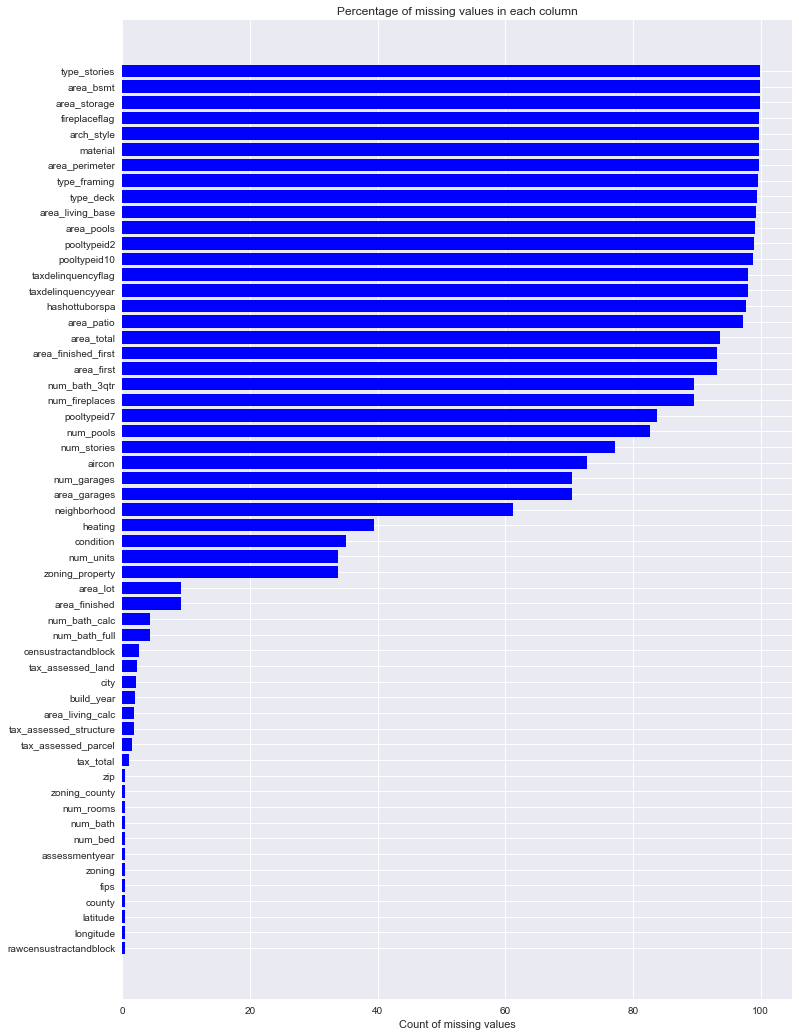

In [408]:
missing = props.isnull().sum(axis=0).reset_index()
missing.columns = ['column_name', 'missing_count']
missing = missing.loc[missing['missing_count']>0]
missing = missing.sort_values(by='missing_count')
missing

ind = np.arange(missing.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing.missing_count.values*100.0/props.shape[0], color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Percentage of missing values in each column")
plt.show()

##### Fork script here to look at missing values (props2, missing2) -- this will be done again after merging with training data if necessary

In [327]:
# Removing NA values in the latitude column removes 11437 rows, which equals the same number of NA values for 5 add'l columns.
props2 = props[props.latitude.notnull()]
props2

,parcelid,aircon,arch_style,area_bsmt,num_bath,num_bed,type_framing,condition,num_bath_calc,type_deck,...,num_stories,fireplaceflag,tax_assessed_structure,tax_assessed_parcel,assessmentyear,tax_assessed_land,tax_total,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN
5,10898347,NaN,NaN,NaN,0.0,0.0,4.0,7.0,NaN,NaN,...,1.0,NaN,176383.0,283315.0,2015.0,106932.0,3661.28,NaN,NaN,NaN
6,10933547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,397945.0,554573.0,2015.0,156628.0,6773.34,NaN,NaN,NaN
7,10940747,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,NaN,101998.0,688486.0,2015.0,586488.0,7857.84,NaN,NaN,NaN
8,10954547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
9,10976347,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,218440.0,261201.0,2015.0,42761.0,4054.76,NaN,NaN,NaN


In [329]:
missing2 = missing2.reset_index(drop=False)
missing2 = missing2.rename(columns={'index': 'property'})
#missing2.drop(['index'], axis=1, inplace=True)
missing2

,property,count
0,type_stories,2972156
1,area_bsmt,2972152
2,area_storage,2971133
3,fireplaceflag,2968617
4,arch_style,2967719
5,material,2967033
6,area_perimeter,2966108
7,type_framing,2961151
8,type_deck,2956684
9,area_living_base,2951779


In [330]:
# Columns with more than 75% missing values
lots_missing = missing2[missing2['count']/props.shape[0]>=.75]
lots_missing.property.tolist()

['type_stories',
 'area_bsmt',
 'area_storage',
 'fireplaceflag',
 'arch_style',
 'material',
 'area_perimeter',
 'type_framing',
 'type_deck',
 'area_living_base',
 'area_pools',
 'pooltypeid2',
 'pooltypeid10',
 'taxdelinquencyflag',
 'taxdelinquencyyear',
 'hashottuborspa',
 'area_patio',
 'area_total',
 'area_first',
 'area_finished_first',
 'num_bath_3qtr',
 'num_fireplaces',
 'pooltypeid7',
 'num_pools',
 'num_stories']

In [331]:
# Remove columns with more than 75% missing values from props2: props3
props2 = props2.drop(['type_stories', 'area_bsmt', 'area_storage', 'fireplaceflag',
       'arch_style', 'material', 'area_perimeter', 'type_framing', 'type_deck',
       'area_living_base', 'area_pools', 'pooltypeid2', 'pooltypeid10',
       'taxdelinquencyflag', 'taxdelinquencyyear', 'hashottuborspa',
       'area_patio', 'area_total', 'area_first', 'area_finished_first',
       'num_bath_3qtr', 'num_fireplaces', 'pooltypeid7', 'num_pools',
       'num_stories'], axis = 1)

In [332]:
# Counts for each heating system type id
props2.heating.value_counts()

# There are 1167379 missing values for heating

2.0     1156830
7.0      595453
6.0       27480
24.0      21107
20.0       3216
13.0       1342
18.0        586
1.0         262
14.0         41
10.0         39
12.0         25
11.0         16
21.0          3
19.0          1
Name: heating, dtype: int64

In [333]:
# Counts for each property land use type id
props2.zoning.value_counts()

261.0    2148362
266.0     481067
246.0     114888
269.0      61469
263.0      58438
248.0      40325
247.0      40022
31.0        9462
265.0       9421
47.0        4314
260.0       2754
267.0       1817
275.0       1201
264.0        204
270.0         36
Name: zoning, dtype: int64

In [334]:
# Counts for each air conditioning type id
props2.aircon.value_counts()

1.0     742364
13.0     58457
5.0       8795
11.0      1818
12.0        59
9.0         19
3.0          7
Name: aircon, dtype: int64

In [335]:
missing2.dtypes

property    object
count        int64
dtype: object

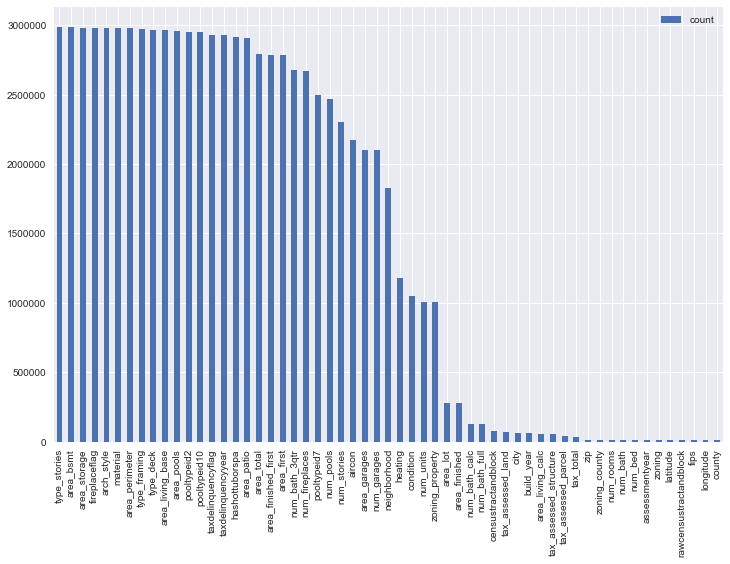

In [336]:
missing.plot(missing.index,kind='bar',figsize=(12,8))

In [337]:
missing2.property.tolist()

['type_stories',
 'area_bsmt',
 'area_storage',
 'fireplaceflag',
 'arch_style',
 'material',
 'area_perimeter',
 'type_framing',
 'type_deck',
 'area_living_base',
 'area_pools',
 'pooltypeid2',
 'pooltypeid10',
 'taxdelinquencyflag',
 'taxdelinquencyyear',
 'hashottuborspa',
 'area_patio',
 'area_total',
 'area_first',
 'area_finished_first',
 'num_bath_3qtr',
 'num_fireplaces',
 'pooltypeid7',
 'num_pools',
 'num_stories',
 'aircon',
 'area_garages',
 'num_garages',
 'neighborhood',
 'heating',
 'condition',
 'num_units',
 'zoning_property',
 'area_lot',
 'area_finished',
 'num_bath_full',
 'num_bath_calc',
 'censustractandblock',
 'tax_assessed_land',
 'city',
 'build_year',
 'area_living_calc',
 'tax_assessed_structure',
 'tax_assessed_parcel',
 'tax_total',
 'zip',
 'zoning_county',
 'num_rooms',
 'num_bath',
 'num_bed',
 'assessmentyear']

In [338]:
len(missing2.index)

51

In [339]:
missing2['count']

0     2972156
1     2972152
2     2971133
3     2968617
4     2967719
5     2967033
6     2966108
7     2961151
8     2956684
9     2951779
10    2945820
11    2941705
12    2936841
13    2917318
14    2917316
15    2904766
16    2893425
17    2782982
18    2771063
19    2771063
20    2662149
21    2661143
22    2488321
23    2456246
24    2291711
25    2162261
26    2090513
27    2090513
28    1817378
29    1167379
30    1035292
31     996290
32     995151
33     264662
34     264596
35     117475
36     117475
37      63689
38      56296
39      51408
40      48491
41      44128
42      43545
43      31113
44      19813
45       2543
46        840
47         38
48         25
49         13
50          2
Name: count, dtype: int64

In [340]:
x = np.arange(len(missing2.index)).tolist()

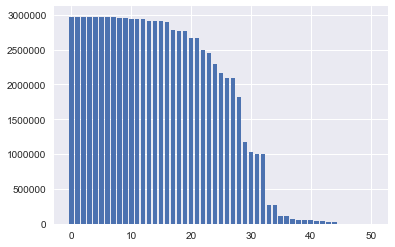

In [341]:
labels = missing2.property.tolist()
plt.bar(missing2.index,missing2['count'])
plt.xticks = (x, labels)
plt.show()                                  # Need to find out why this isn't working

### Merge train_2016.csv and properties_2016.csv
##### Reexplore items above on merged data

In [342]:
df = train.merge(props)

In [343]:
pd.set_option('display.max_rows', 65)
df.head().transpose()

,0,1,2,3,4
parcelid,11016594,14366692,12098116,12643413,14432541
logerror,0.0276,-0.1684,-0.004,0.0218,-0.005
transactiondate,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-02 00:00:00
year,2016,2016,2016,2016,2016
month,1,1,1,1,1
aircon,1,NaN,1,1,NaN
arch_style,NaN,NaN,NaN,NaN,NaN
area_bsmt,NaN,NaN,NaN,NaN,NaN
num_bath,2,3.5,3,2,2.5
num_bed,3,4,2,2,4


In [344]:
df.dtypes

parcelid                           int64
logerror                         float64
transactiondate           datetime64[ns]
year                               int64
month                              int64
aircon                           float64
arch_style                       float64
area_bsmt                        float64
num_bath                         float64
num_bed                          float64
type_framing                     float64
condition                        float64
num_bath_calc                    float64
type_deck                        float64
area_first                       float64
area_living_calc                 float64
area_finished                    float64
area_perimeter                   float64
area_total                       float64
area_finished_first              float64
area_living_base                 float64
fips                             float64
num_fireplaces                   float64
num_bath_full                    float64
num_garages     

In [400]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing

,Total,Percent
type_framing,89598,0.999821
area_bsmt,89571,0.999520
type_stories,89571,0.999520
area_storage,89519,0.998940
fireplaceflag,89392,0.997523
arch_style,89353,0.997088
material,89315,0.996663
type_deck,88956,0.992657
area_pools,88645,0.989187
pooltypeid10,88453,0.987044


In [436]:
# columns with more than 25% missing values
df.isnull().sum()[df.isnull().sum()/df.shape[0]>.25].index

Index(['aircon', 'arch_style', 'area_bsmt', 'type_framing', 'condition',
       'type_deck', 'num_fireplaces', 'num_garages', 'area_garages',
       'hashottuborspa', 'heating', 'num_pools', 'area_pools', 'pooltypeid10',
       'pooltypeid2', 'pooltypeid7', 'zoning_property', 'neighborhood',
       'type_stories', 'num_bath_3qtr', 'material', 'num_units', 'area_patio',
       'area_storage', 'num_stories', 'fireplaceflag', 'taxdelinquencyflag',
       'taxdelinquencyyear'],
      dtype='object')

In [347]:
# start creating groups of like items and compare missing values
# anything with zoning, living area, 

In [348]:
# Living area columns
df_living = df[['area_first','area_living_calc','area_finished','area_perimeter','area_total',
                'area_finished_first','area_living_base']]
df_living

,area_first,area_living_calc,area_finished,area_perimeter,area_total,area_finished_first,area_living_base
0,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN
1,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN
2,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN
3,NaN,839.0,839.0,NaN,NaN,NaN,NaN
4,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN
5,NaN,3067.0,3067.0,NaN,NaN,NaN,NaN
6,NaN,1297.0,1297.0,NaN,NaN,NaN,NaN
7,853.0,1763.0,1763.0,NaN,NaN,853.0,NaN
8,NaN,796.0,796.0,NaN,NaN,NaN,NaN
9,NaN,1260.0,1260.0,NaN,NaN,NaN,NaN


In [349]:
# Drop rows with all NA values
df_living = df_living.dropna(axis=0, how='all')
df_living

,area_first,area_living_calc,area_finished,area_perimeter,area_total,area_finished_first,area_living_base
0,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN
1,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN
2,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN
3,NaN,839.0,839.0,NaN,NaN,NaN,NaN
4,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN
5,NaN,3067.0,3067.0,NaN,NaN,NaN,NaN
6,NaN,1297.0,1297.0,NaN,NaN,NaN,NaN
7,853.0,1763.0,1763.0,NaN,NaN,853.0,NaN
8,NaN,796.0,796.0,NaN,NaN,NaN,NaN
9,NaN,1260.0,1260.0,NaN,NaN,NaN,NaN


In [350]:
#df_living[(df_living.area_living_calc != df_living.area_finished) & df_living.area_finished.notnull()]

# All rows in area_finished that are not NaN are equal to area_living_calc. 
# Therefore, area_finished will be replaced with values in area_living_calc and then a_l_c will be removed from the df.

df_living = df_living.rename(columns={'area_living_calc': 'area_living'})
df_living = df_living.drop(['area_first','area_perimeter','area_total','area_finished_first',
                            'area_living_base','area_finished'], axis=1)
df_living

,area_living
0,1684.0
1,2263.0
2,2217.0
3,839.0
4,2283.0
5,3067.0
6,1297.0
7,1763.0
8,796.0
9,1260.0


In [351]:
df

,parcelid,logerror,transactiondate,year,month,aircon,arch_style,area_bsmt,num_bath,num_bed,...,num_stories,fireplaceflag,tax_assessed_structure,tax_assessed_parcel,assessmentyear,tax_assessed_land,tax_total,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,2016,1,1.0,NaN,NaN,2.0,3.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,2016,1,NaN,NaN,NaN,3.5,4.0,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,2016,1,1.0,NaN,NaN,3.0,2.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,2016,1,1.0,NaN,NaN,2.0,2.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,2016,1,NaN,NaN,NaN,2.5,4.0,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13
5,11509835,-0.2705,2016-01-02,2016,1,1.0,NaN,NaN,4.0,4.0,...,NaN,NaN,880650.0,2447951.0,2015.0,1567301.0,27126.57,NaN,NaN,6.037621e+13
6,12286022,0.0440,2016-01-02,2016,1,NaN,NaN,NaN,1.0,2.0,...,NaN,NaN,64549.0,111521.0,2015.0,46972.0,2304.97,NaN,NaN,6.037542e+13
7,17177301,0.1638,2016-01-02,2016,1,NaN,NaN,NaN,2.5,3.0,...,2.0,NaN,107000.0,306000.0,2015.0,199000.0,3745.50,NaN,NaN,6.111003e+13
8,14739064,-0.0030,2016-01-02,2016,1,NaN,NaN,NaN,1.0,2.0,...,NaN,NaN,66834.0,210064.0,2015.0,143230.0,2172.88,NaN,NaN,6.059042e+13
9,14677559,0.0843,2016-01-03,2016,1,NaN,NaN,NaN,2.0,2.0,...,1.0,NaN,109977.0,190960.0,2015.0,80983.0,1940.26,NaN,NaN,6.059063e+13


In [352]:
# Merge cleaned living area subset into df
df = df.merge(df_living, left_index=True, right_index=True)
df = df.drop(['area_first','area_perimeter','area_total','area_finished_first',
                            'area_living_base','area_finished','area_living_calc'], axis=1)

In [362]:
# Drop all columns with more than 25% missing values: df1 (may want to revisit df to see which other values can be filled in)
df1 = df.drop(['aircon', 'arch_style', 'area_bsmt', 'type_framing', 'condition',
       'type_deck', 'num_fireplaces', 'num_garages', 'area_garages',
       'hashottuborspa', 'heating', 'num_pools', 'area_pools', 'pooltypeid10',
       'pooltypeid2', 'pooltypeid7', 'zoning_property', 'neighborhood',
       'type_stories', 'num_bath_3qtr', 'material', 'num_units', 'area_patio',
       'area_storage', 'num_stories', 'fireplaceflag', 'taxdelinquencyflag',
       'taxdelinquencyyear'], axis=1)

In [363]:
df1

,parcelid,logerror,transactiondate,year,month,num_bath,num_bed,num_bath_calc,fips,num_bath_full,...,zip,num_rooms,build_year,tax_assessed_structure,tax_assessed_parcel,assessmentyear,tax_assessed_land,tax_total,censustractandblock,area_living
0,11016594,0.0276,2016-01-01,2016,1,2.0,3.0,2.0,6037.0,2.0,...,96370.0,0.0,1959.0,122754.0,360170.0,2015.0,237416.0,6735.88,6.037107e+13,1684.0
1,14366692,-0.1684,2016-01-01,2016,1,3.5,4.0,3.5,6059.0,3.0,...,96962.0,0.0,2014.0,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,2263.0
2,12098116,-0.0040,2016-01-01,2016,1,3.0,2.0,3.0,6037.0,3.0,...,96293.0,0.0,1940.0,61994.0,119906.0,2015.0,57912.0,11484.48,6.037464e+13,2217.0
3,12643413,0.0218,2016-01-02,2016,1,2.0,2.0,2.0,6037.0,2.0,...,96222.0,0.0,1987.0,171518.0,244880.0,2015.0,73362.0,3048.74,6.037296e+13,839.0
4,14432541,-0.0050,2016-01-02,2016,1,2.5,4.0,2.5,6059.0,2.0,...,96961.0,8.0,1981.0,169574.0,434551.0,2015.0,264977.0,5488.96,6.059042e+13,2283.0
5,11509835,-0.2705,2016-01-02,2016,1,4.0,4.0,4.0,6037.0,4.0,...,96109.0,0.0,1982.0,880650.0,2447951.0,2015.0,1567301.0,27126.57,6.037621e+13,3067.0
6,12286022,0.0440,2016-01-02,2016,1,1.0,2.0,1.0,6037.0,1.0,...,96091.0,0.0,1939.0,64549.0,111521.0,2015.0,46972.0,2304.97,6.037542e+13,1297.0
7,17177301,0.1638,2016-01-02,2016,1,2.5,3.0,2.5,6111.0,2.0,...,97101.0,6.0,1994.0,107000.0,306000.0,2015.0,199000.0,3745.50,6.111003e+13,1763.0
8,14739064,-0.0030,2016-01-02,2016,1,1.0,2.0,1.0,6059.0,1.0,...,96987.0,0.0,1984.0,66834.0,210064.0,2015.0,143230.0,2172.88,6.059042e+13,796.0
9,14677559,0.0843,2016-01-03,2016,1,2.0,2.0,2.0,6059.0,2.0,...,96963.0,5.0,1977.0,109977.0,190960.0,2015.0,80983.0,1940.26,6.059063e+13,1260.0


In [371]:
# Review missing counts for df1
total1 = df1.isnull().sum().sort_values(ascending=False)
percent1 = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
missing1 = pd.concat([total1, percent1], axis=1, keys=['Total','Percent'])
missing1

,Total,Percent
area_lot,9822,0.109605
city,1703,0.019004
num_bath_full,530,0.005914
num_bath_calc,530,0.005914
censustractandblock,233,0.002600
build_year,108,0.001205
zip,17,0.000190
tax_total,6,0.000067
num_bed,0,0.000000
fips,0,0.000000


In [365]:
df1[df1.tax_assessed_land.isnull() | df1.tax_assessed_parcel.isnull() | df1.tax_assessed_structure.isnull()]

# Tax_assessed_structure = tax_assessed_parcel - tax_assessed_land
df1.tax_assessed_structure = df1.tax_assessed_parcel - df1.tax_assessed_land
df1

,parcelid,logerror,transactiondate,year,month,num_bath,num_bed,num_bath_calc,fips,num_bath_full,...,zip,num_rooms,build_year,tax_assessed_structure,tax_assessed_parcel,assessmentyear,tax_assessed_land,tax_total,censustractandblock,area_living
0,11016594,0.0276,2016-01-01,2016,1,2.0,3.0,2.0,6037.0,2.0,...,96370.0,0.0,1959.0,122754.0,360170.0,2015.0,237416.0,6735.88,6.037107e+13,1684.0
1,14366692,-0.1684,2016-01-01,2016,1,3.5,4.0,3.5,6059.0,3.0,...,96962.0,0.0,2014.0,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,2263.0
2,12098116,-0.0040,2016-01-01,2016,1,3.0,2.0,3.0,6037.0,3.0,...,96293.0,0.0,1940.0,61994.0,119906.0,2015.0,57912.0,11484.48,6.037464e+13,2217.0
3,12643413,0.0218,2016-01-02,2016,1,2.0,2.0,2.0,6037.0,2.0,...,96222.0,0.0,1987.0,171518.0,244880.0,2015.0,73362.0,3048.74,6.037296e+13,839.0
4,14432541,-0.0050,2016-01-02,2016,1,2.5,4.0,2.5,6059.0,2.0,...,96961.0,8.0,1981.0,169574.0,434551.0,2015.0,264977.0,5488.96,6.059042e+13,2283.0
5,11509835,-0.2705,2016-01-02,2016,1,4.0,4.0,4.0,6037.0,4.0,...,96109.0,0.0,1982.0,880650.0,2447951.0,2015.0,1567301.0,27126.57,6.037621e+13,3067.0
6,12286022,0.0440,2016-01-02,2016,1,1.0,2.0,1.0,6037.0,1.0,...,96091.0,0.0,1939.0,64549.0,111521.0,2015.0,46972.0,2304.97,6.037542e+13,1297.0
7,17177301,0.1638,2016-01-02,2016,1,2.5,3.0,2.5,6111.0,2.0,...,97101.0,6.0,1994.0,107000.0,306000.0,2015.0,199000.0,3745.50,6.111003e+13,1763.0
8,14739064,-0.0030,2016-01-02,2016,1,1.0,2.0,1.0,6059.0,1.0,...,96987.0,0.0,1984.0,66834.0,210064.0,2015.0,143230.0,2172.88,6.059042e+13,796.0
9,14677559,0.0843,2016-01-03,2016,1,2.0,2.0,2.0,6059.0,2.0,...,96963.0,5.0,1977.0,109977.0,190960.0,2015.0,80983.0,1940.26,6.059063e+13,1260.0


In [366]:
df1[df1.tax_assessed_structure==0] # Verify how many properties have no structure assessed

,parcelid,logerror,transactiondate,year,month,num_bath,num_bed,num_bath_calc,fips,num_bath_full,...,zip,num_rooms,build_year,tax_assessed_structure,tax_assessed_parcel,assessmentyear,tax_assessed_land,tax_total,censustractandblock,area_living
101,14324521,-0.199700,2016-01-04,2016,1,4.0,3.0,4.0,6059.0,4.0,...,96957.0,7.0,1960.0,0.0,3020077.0,2015.0,3020077.0,74674.70,6.059063e+13,2921.0
319,12966592,-0.046000,2016-01-05,2016,1,1.0,2.0,1.0,6037.0,1.0,...,96273.0,0.0,1900.0,0.0,382492.0,2015.0,382492.0,8207.18,6.037430e+13,949.0
592,12222991,-0.216900,2016-01-05,2016,1,2.0,2.0,2.0,6037.0,2.0,...,96028.0,0.0,1948.0,0.0,114755.0,2015.0,114755.0,3873.86,6.037600e+13,847.0
2447,13991826,-0.291700,2016-01-14,2016,1,0.0,0.0,NaN,6059.0,NaN,...,97023.0,7.0,1954.0,0.0,163196.0,2015.0,163196.0,5333.58,6.059088e+13,1462.0
4060,12130228,0.043100,2016-01-21,2016,1,2.0,2.0,2.0,6037.0,2.0,...,96267.0,0.0,1949.0,0.0,1325974.0,2015.0,1325974.0,26130.86,6.037430e+13,1544.0
4098,12531057,-0.121000,2016-01-21,2016,1,1.0,1.0,1.0,6037.0,1.0,...,96237.0,0.0,1925.0,0.0,596688.0,2015.0,596688.0,7186.04,6.037577e+13,778.0
5113,11547227,-0.342500,2016-01-26,2016,1,1.0,2.0,1.0,6037.0,1.0,...,96127.0,0.0,1953.0,0.0,1708466.0,2015.0,1708466.0,20776.89,6.037273e+13,780.0
6469,12144604,0.089800,2016-01-29,2016,1,3.0,5.0,3.0,6037.0,3.0,...,96268.0,0.0,1938.0,0.0,1291009.0,2015.0,1291009.0,28935.91,6.037432e+13,3419.0
8778,11668168,-0.342500,2016-02-11,2016,2,2.0,2.0,2.0,6037.0,2.0,...,96120.0,0.0,1942.0,0.0,1959075.0,2015.0,1959075.0,47862.11,6.037263e+13,1466.0
8958,11545770,-0.342500,2016-02-11,2016,2,2.0,1.0,2.0,6037.0,2.0,...,96127.0,0.0,1946.0,0.0,1300474.0,2015.0,1300474.0,25961.19,6.037274e+13,952.0


In [375]:
# Missing value for tax_assessed_parcel is same row as missing value for tax_assessed_land - delete this row
df1 = df1[pd.notnull(df1['tax_assessed_land'])]

# Cols with missing value for tax total to be removed, there is no way to know what this value is
df1 = df1[pd.notnull(df1['tax_total'])]

In [244]:
# Try to find how many of each type of zoning_county for zoning=266
df1[['zoning_county','zoning']].groupby(by='zoning').describe()

zoning_county
zoning                     
31.0   count             17
       unique             5
       top             1210
       freq               7
47.0   count              1
       unique             1
       top             1200
       freq               1
246.0  count           2373
       unique             9
       top             0200
       freq            2150
247.0  count            628
       unique             8
       top             0300
       freq             577
248.0  count            867
       unique             8
       top             0400
       freq             743
260.0  count             26
       unique             2
       top             010V
       freq              23
261.0  count          60362
       unique            19
       top             0100
       freq           30804
263.0  count             69
       unique             3
       top             0700
       freq              54
264.0  count             11
       unique             2
       top             012E
       freq               7
265.0  count            356
       unique             1
       top             1128
       freq             356
266.0  count          22635
       unique             9
       top             010C
       freq           10240
267.0  count             28
       unique             1
       top             010F
       freq              28
269.0  count           2193
       unique             2
       top             010D
       freq            2192
275.0  count             46
       unique             1
       top             1117
       freq              46

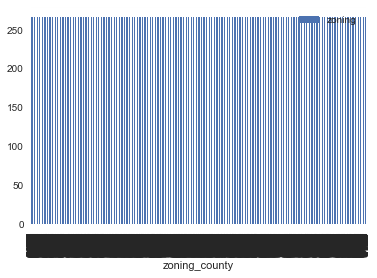

In [243]:
t = df1[['zoning_county','zoning']]
t[t.zoning_county.isnull()]
t = t[t.zoning==266]
#t.plot(x='zoning_county', kind='bar')

In [370]:
# Replace zoning_county=NaN with 010C as it's the most common
df1.loc[df1.zoning_county.isnull(),'zoning_county']='010C'

C:\Users\conee\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [372]:
# Sort lat/long and ffill missing city names
location = df1[['city','latitude','longitude']]
#location[location.city.isnull()]
location = location.sort_values(['latitude','longitude']).fillna(method='ffill')

In [373]:
df1 = df1.sort_values(['latitude','longitude'])
location = location.sort_values(['latitude','longitude'])
df1.update(location)
df1

,parcelid,logerror,transactiondate,year,month,num_bath,num_bed,num_bath_calc,fips,num_bath_full,...,zip,num_rooms,build_year,tax_assessed_structure,tax_assessed_parcel,assessmentyear,tax_assessed_land,tax_total,censustractandblock,area_living
4176,12658092,0.050700,2016-01-21,2016,1,2.0,2.0,2.0,6037.0,2.0,...,96207.0,0.0,1978.0,165947.0,327635.0,2015.0,161688.0,5433.63,6.037599e+13,1703.0
11374,12659026,-0.166100,2016-02-24,2016,2,2.0,2.0,2.0,6037.0,2.0,...,96207.0,0.0,1920.0,300894.0,545689.0,2015.0,244795.0,7949.83,6.037599e+13,865.0
60917,12659032,-0.047100,2016-07-29,2016,7,3.0,3.0,3.0,6037.0,3.0,...,96207.0,0.0,1996.0,265712.0,398565.0,2015.0,132853.0,6174.19,6.037599e+13,1500.0
38326,12658206,-0.018200,2016-05-24,2016,5,2.0,2.0,2.0,6037.0,2.0,...,96207.0,0.0,1964.0,89781.0,139956.0,2015.0,50175.0,3036.02,6.037599e+13,1422.0
72995,12659124,0.042100,2016-09-02,2016,9,2.0,2.0,2.0,6037.0,2.0,...,96207.0,0.0,1965.0,103700.0,271000.0,2015.0,167300.0,5934.02,6.037599e+13,902.0
22424,12659531,0.049700,2016-04-04,2016,4,2.0,3.0,2.0,6037.0,2.0,...,96207.0,0.0,1975.0,182892.0,454618.0,2015.0,271726.0,6713.99,6.037599e+13,1320.0
4194,12658954,0.145800,2016-01-21,2016,1,2.0,2.0,2.0,6037.0,2.0,...,96207.0,0.0,1919.0,23225.0,70326.0,2015.0,47101.0,3918.35,6.037599e+13,1050.0
45905,12658960,0.107100,2016-06-15,2016,6,2.0,3.0,2.0,6037.0,2.0,...,96207.0,0.0,1919.0,336593.0,841483.0,2015.0,504890.0,12944.61,6.037599e+13,1080.0
85740,12658846,0.077000,2016-10-17,2016,10,2.0,4.0,2.0,6037.0,2.0,...,96207.0,0.0,1920.0,230186.0,457174.0,2015.0,226988.0,9979.99,6.037599e+13,1266.0
60433,12658293,0.438300,2016-07-28,2016,7,4.0,3.0,4.0,6037.0,4.0,...,96207.0,0.0,1981.0,257868.0,801279.0,2015.0,543411.0,12507.54,6.037599e+13,1864.0


In [422]:
# Review missing counts for df1
total1 = df1.isnull().sum().sort_values(ascending=False)
percent1 = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
missing1 = pd.concat([total1, percent1], axis=1, keys=['Total','Percent'])
missing1

,Total,Percent
area_lot,9818,0.109567
censustractandblock,233,0.002600
build_year,108,0.001205
area_living,0,0.000000
zoning_county,0,0.000000
logerror,0,0.000000
transactiondate,0,0.000000
year,0,0.000000
month,0,0.000000
num_bath,0,0.000000


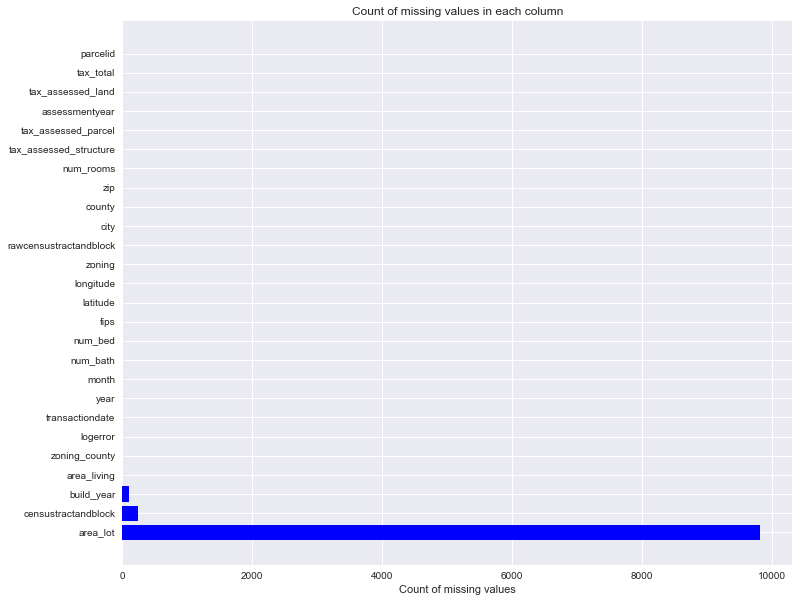

In [416]:
ind = np.arange(missing1.shape[0])
width = 0.5
fig, ax = plt.subplots(figsize=(12,10))
rects = ax.barh(ind, missing1['Total'].values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing1.index, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Count of missing values in each column")
plt.show()

In [377]:
zipcode = df1[['city','zip']].sort_values(['city','zip'])
zipcode = zipcode.zip.ffill()

In [378]:
df1.update(zipcode)
df1

,parcelid,logerror,transactiondate,year,month,num_bath,num_bed,num_bath_calc,fips,num_bath_full,...,zip,num_rooms,build_year,tax_assessed_structure,tax_assessed_parcel,assessmentyear,tax_assessed_land,tax_total,censustractandblock,area_living
4176,12658092,0.050700,2016-01-21,2016,1,2.0,2.0,2.0,6037.0,2.0,...,96207.0,0.0,1978.0,165947.0,327635.0,2015.0,161688.0,5433.63,6.037599e+13,1703.0
11374,12659026,-0.166100,2016-02-24,2016,2,2.0,2.0,2.0,6037.0,2.0,...,96207.0,0.0,1920.0,300894.0,545689.0,2015.0,244795.0,7949.83,6.037599e+13,865.0
60917,12659032,-0.047100,2016-07-29,2016,7,3.0,3.0,3.0,6037.0,3.0,...,96207.0,0.0,1996.0,265712.0,398565.0,2015.0,132853.0,6174.19,6.037599e+13,1500.0
38326,12658206,-0.018200,2016-05-24,2016,5,2.0,2.0,2.0,6037.0,2.0,...,96207.0,0.0,1964.0,89781.0,139956.0,2015.0,50175.0,3036.02,6.037599e+13,1422.0
72995,12659124,0.042100,2016-09-02,2016,9,2.0,2.0,2.0,6037.0,2.0,...,96207.0,0.0,1965.0,103700.0,271000.0,2015.0,167300.0,5934.02,6.037599e+13,902.0
22424,12659531,0.049700,2016-04-04,2016,4,2.0,3.0,2.0,6037.0,2.0,...,96207.0,0.0,1975.0,182892.0,454618.0,2015.0,271726.0,6713.99,6.037599e+13,1320.0
4194,12658954,0.145800,2016-01-21,2016,1,2.0,2.0,2.0,6037.0,2.0,...,96207.0,0.0,1919.0,23225.0,70326.0,2015.0,47101.0,3918.35,6.037599e+13,1050.0
45905,12658960,0.107100,2016-06-15,2016,6,2.0,3.0,2.0,6037.0,2.0,...,96207.0,0.0,1919.0,336593.0,841483.0,2015.0,504890.0,12944.61,6.037599e+13,1080.0
85740,12658846,0.077000,2016-10-17,2016,10,2.0,4.0,2.0,6037.0,2.0,...,96207.0,0.0,1920.0,230186.0,457174.0,2015.0,226988.0,9979.99,6.037599e+13,1266.0
60433,12658293,0.438300,2016-07-28,2016,7,4.0,3.0,4.0,6037.0,4.0,...,96207.0,0.0,1981.0,257868.0,801279.0,2015.0,543411.0,12507.54,6.037599e+13,1864.0


In [ ]:
# Drop 'censustractandblock' if not critical
#df1 = df1.drop(['censustractandblock'], axis = 1)

In [396]:
# Remove num_bath_full and num_bath_calc
df1.drop(['num_bath_full', 'num_bath_calc'], axis=1, inplace=True)

In [417]:
df1[df1.build_year.isnull()]

,parcelid,logerror,transactiondate,year,month,num_bath,num_bed,fips,latitude,longitude,...,zip,num_rooms,build_year,tax_assessed_structure,tax_assessed_parcel,assessmentyear,tax_assessed_land,tax_total,censustractandblock,area_living
74057,14744810,-0.006000,2016-09-08,2016,9,3.0,2.0,6059.0,33496159.0,-117710149.0,...,96987.0,0.0,NaN,0.0,208165.0,2015.0,208165.0,2615.68,6.059042e+13,1518.0
27617,14738915,0.042100,2016-04-21,2016,4,2.0,2.0,6059.0,33527481.0,-117682179.0,...,96987.0,0.0,NaN,54584.0,267000.0,2015.0,212416.0,2716.62,6.059042e+13,873.0
39121,14738913,0.026600,2016-05-26,2016,5,1.5,1.0,6059.0,33527481.0,-117682124.0,...,96987.0,0.0,NaN,51488.0,198694.0,2015.0,147206.0,1985.24,6.059042e+13,899.0
54122,14738882,-0.006000,2016-07-08,2016,7,1.5,1.0,6059.0,33528288.0,-117682460.0,...,96987.0,0.0,NaN,61686.0,267000.0,2015.0,205314.0,2645.78,6.059042e+13,899.0
10360,14409530,-0.145000,2016-02-19,2016,2,4.5,5.0,6059.0,33532430.0,-117659119.0,...,96985.0,0.0,NaN,817228.0,1464303.0,2015.0,647075.0,15595.72,6.059032e+13,5300.0
9768,14480320,0.463882,2016-02-17,2016,2,0.0,0.0,6059.0,33605076.0,-117586957.0,...,96989.0,0.0,NaN,1095396.0,2348409.0,2015.0,1253013.0,24709.90,6.059032e+13,6338.0
75170,12646363,-0.342500,2016-09-12,2016,9,0.0,0.0,6037.0,33743478.0,-118285009.0,...,96221.0,0.0,NaN,45241.0,226254.0,2015.0,181013.0,3037.90,6.037296e+13,2465.0
5278,12646168,0.236700,2016-01-27,2016,1,2.0,4.0,6037.0,33745734.0,-118285516.0,...,96221.0,0.0,NaN,46247.0,156614.0,2015.0,110367.0,2031.63,6.037296e+13,1318.0
83392,12538409,-0.040800,2016-10-07,2016,10,0.0,0.0,6037.0,33768327.0,-118156779.0,...,96246.0,0.0,NaN,153643.0,397066.0,2015.0,243423.0,8937.00,6.037577e+13,1678.0
28996,12532460,0.041100,2016-04-26,2016,4,2.0,2.0,6037.0,33772337.0,-118140343.0,...,96246.0,0.0,NaN,76204.0,414225.0,2015.0,338021.0,5162.06,6.037578e+13,1464.0


In [421]:
# Drop rest of NA values for clean set to continue (can revert to df1 if necessary)
#df_clean = df1[(df1.build_year.notnull()) & (df1.censustractandblock.notnull()) & df1.area_lot.notnull()]
df_clean = df1.dropna()
df_clean

,parcelid,logerror,transactiondate,year,month,num_bath,num_bed,fips,latitude,longitude,...,zip,num_rooms,build_year,tax_assessed_structure,tax_assessed_parcel,assessmentyear,tax_assessed_land,tax_total,censustractandblock,area_living
4176,12658092,0.050700,2016-01-21,2016,1,2.0,2.0,6037.0,33339295.0,-118331034.0,...,96207.0,0.0,1978.0,165947.0,327635.0,2015.0,161688.0,5433.63,6.037599e+13,1703.0
11374,12659026,-0.166100,2016-02-24,2016,2,2.0,2.0,6037.0,33340045.0,-118325943.0,...,96207.0,0.0,1920.0,300894.0,545689.0,2015.0,244795.0,7949.83,6.037599e+13,865.0
60917,12659032,-0.047100,2016-07-29,2016,7,3.0,3.0,6037.0,33340134.0,-118325615.0,...,96207.0,0.0,1996.0,265712.0,398565.0,2015.0,132853.0,6174.19,6.037599e+13,1500.0
38326,12658206,-0.018200,2016-05-24,2016,5,2.0,2.0,6037.0,33340239.0,-118324732.0,...,96207.0,0.0,1964.0,89781.0,139956.0,2015.0,50175.0,3036.02,6.037599e+13,1422.0
72995,12659124,0.042100,2016-09-02,2016,9,2.0,2.0,6037.0,33340508.0,-118324950.0,...,96207.0,0.0,1965.0,103700.0,271000.0,2015.0,167300.0,5934.02,6.037599e+13,902.0
22424,12659531,0.049700,2016-04-04,2016,4,2.0,3.0,6037.0,33340566.0,-118323884.0,...,96207.0,0.0,1975.0,182892.0,454618.0,2015.0,271726.0,6713.99,6.037599e+13,1320.0
4194,12658954,0.145800,2016-01-21,2016,1,2.0,2.0,6037.0,33340617.0,-118326404.0,...,96207.0,0.0,1919.0,23225.0,70326.0,2015.0,47101.0,3918.35,6.037599e+13,1050.0
45905,12658960,0.107100,2016-06-15,2016,6,2.0,3.0,6037.0,33340937.0,-118326111.0,...,96207.0,0.0,1919.0,336593.0,841483.0,2015.0,504890.0,12944.61,6.037599e+13,1080.0
85740,12658846,0.077000,2016-10-17,2016,10,2.0,4.0,6037.0,33341018.0,-118327253.0,...,96207.0,0.0,1920.0,230186.0,457174.0,2015.0,226988.0,9979.99,6.037599e+13,1266.0
60433,12658293,0.438300,2016-07-28,2016,7,4.0,3.0,6037.0,33341351.0,-118324652.0,...,96207.0,0.0,1981.0,257868.0,801279.0,2015.0,543411.0,12507.54,6.037599e+13,1864.0


In [424]:
# Verify data is clean
df_clean.isnull().sum().sort_values(ascending=False)

area_living               0
censustractandblock       0
logerror                  0
transactiondate           0
year                      0
month                     0
num_bath                  0
num_bed                   0
fips                      0
latitude                  0
longitude                 0
area_lot                  0
zoning_county             0
zoning                    0
rawcensustractandblock    0
city                      0
county                    0
zip                       0
num_rooms                 0
build_year                0
tax_assessed_structure    0
tax_assessed_parcel       0
assessmentyear            0
tax_assessed_land         0
tax_total                 0
parcelid                  0
dtype: int64

In [437]:
df_clean.to_csv('df_clean.csv')